In [1]:
import pandas as pd
import numpy as np
import pickle
import keras 
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD
from keras.metrics import top_k_categorical_accuracy
import os

import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from itertools import cycle
from sklearn.metrics import roc_curve, auc,precision_score,recall_score,f1_score

import rainbow

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.chdir('C:\\Users\\Shan\\Desktop\\ECS171 PROJECT')

In [3]:
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [4]:
colorr = []
for a,b in enumerate(colors):
    colorr.append(b)

In [5]:
import random
random.shuffle (colorr)

In [6]:
with open('171_Project_Data/pikle/xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('171_Project_Data/pikle/xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('171_Project_Data/pikle/ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('171_Project_Data/pikle/ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [7]:
X_train = X_train.reshape(24000,28,28,1)
X_test = X_test.reshape(6000,28,28,1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
os.chdir(os.getcwd()+'\\result')

In [9]:
os.getcwd()

'C:\\Users\\Shan\\Desktop\\ECS171 PROJECT\\result'

In [10]:
def PR_curve(y_test,y_pred,label,co):
    n_classes=10
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        y_pred.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall['micro'], precision['micro'], color=co, alpha=1,
             where='post',label=label+' (AP = {0:0.2f}'.format(average_precision["micro"])+')')
    #plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color=co,
     #                **step_kwargs)
        
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes')
    return(average_precision["micro"])
    
def ROC_curve(y_test, y_pred,legend,co):
    n_classes=10
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw = 2
    plt.plot(fpr[2], tpr[2], color=co,
             lw=lw, label=legend+' ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color=co, lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('PR_Curve')
    plt.legend(loc="lower right")
    return(roc_auc[2])

Average precision score, micro-averaged over all classes: 0.80
Average precision score, micro-averaged over all classes: 0.82
Average precision score, micro-averaged over all classes: 0.87
Average precision score, micro-averaged over all classes: 0.91
Average precision score, micro-averaged over all classes: 0.74


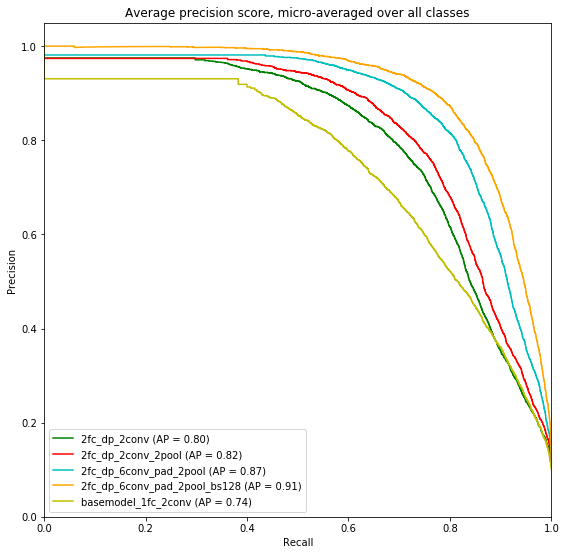

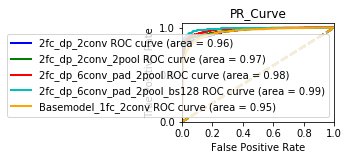

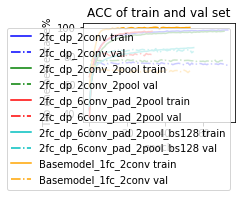

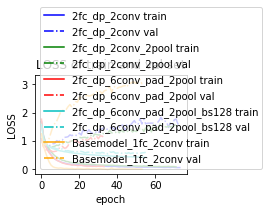

In [11]:
i=0
AP=[]

plt.figure(figsize=(20,20))
plt.subplot(221)
for path in os.listdir():
    with open(os.getcwd()+'\\'+path+'\\'+path+'_pred.pickle', 'rb') as f:
            y_pred = pickle.load(f)
    color = ['b','g','r','c','orange','y','k','w']
    i=i+1
    co = color[i]
    AP.append(PR_curve(y_test,y_pred,path,co))
    plt.legend()
plt.show()


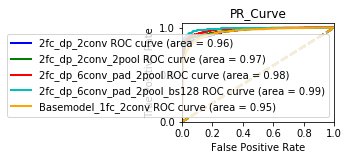

In [12]:
i=0
AUC = []
plt.subplot(222)

for path in os.listdir():
    with open(os.getcwd()+'\\'+path+'\\'+path+'_pred.pickle', 'rb') as f:
            y_pred = pickle.load(f)
    color = ['b','g','r','c','orange','y','k','w']
    co = color[i]
    i=i+1
    AUC.append(ROC_curve(y_test,y_pred,str.upper(path[0])+path[1:],co))
plt.show()

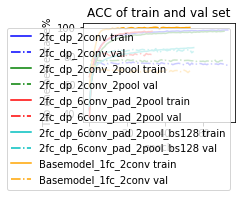

In [13]:
i=0
val_acc = []
val_index = []
plt.subplot(223)

for path in os.listdir():
    with open(os.getcwd()+'\\'+path+'\\'+path+'_history.pickle', 'rb') as f:
            history = pickle.load(f)
    color = ['b','g','r','c','orange','y','k','w']
    co = color[i]
    i=i+1
    plt.plot(np.array(history['acc'])*100,label=str.upper(path[0])+path[1:]+' train',color=co,linestyle='-')
    plt.plot(np.array(history['val_acc'])*100,label=str.upper(path[0])+path[1:]+' val',color=co,linestyle='-.')
    val_acc.append(np.max(history['val_acc']))
    val_index.append(np.argmax(history['val_acc']))
    plt.title("ACC of train and val set")
    plt.xlabel('epoch')
    plt.ylabel('Top one percentage%')
    plt.legend()
    
plt.show()

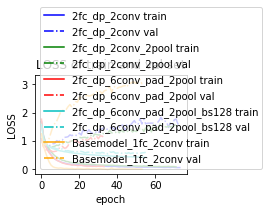

In [14]:
i=0
val_loss = []
plt.subplot(224)


for path in os.listdir():
    with open(os.getcwd()+'\\'+path+'\\'+path+'_history.pickle', 'rb') as f:
            history = pickle.load(f)
    color = ['b','g','r','c','orange','y','k','w']
    co = color[i]
   
    plt.plot(np.array(history['loss']),label=str.upper(path[0])+path[1:]+' train',color=co)
    plt.plot(np.array(history['val_loss']),label=str.upper(path[0])+path[1:]+' val',color=co,linestyle='-.')
    val_loss.append((history['val_loss'])[val_index[i]])
    i=i+1
    plt.title("LOSS of train and val set")
    plt.xlabel('epoch')
    plt.ylabel('LOSS')
    plt.legend()

plt.show()

In [15]:
name=[]
for path in os.listdir():
    name.append(path)

In [16]:
Result = pd.DataFrame([name,AUC,AP,val_acc,val_loss]).T
Result.columns = ['Model_Name','AUC','AP','ACC','Validation Loss']
Result.style.set_properties(**{'text-align': 'left'})

,Model_Name,AUC,AP,ACC,Validation Loss
0,2fc_dp_2conv,0.96105,0.800445,0.758889,1.3001
1,2fc_dp_2conv_2pool,0.967358,0.824316,0.775278,1.12709
2,2fc_dp_6conv_pad_2pool,0.979612,0.873008,0.821667,0.744979
3,2fc_dp_6conv_pad_2pool_bs128,0.988682,0.908667,0.851667,0.542538
4,basemodel_1fc_2conv,0.954791,0.744449,0.7325,0.855834


In [17]:
def metrics(y_test, y_pred):
    y_pred_ = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
    y_test = [np.argmax(y_test[i]) for i in range(len(y_test))]
    categories = ['ant', 'bear', 'bee', 'cat', 'crab', 'dragon', 'elephant', 'mouse', 'sea turtle', 'snail']
    p = precision_score(y_test, y_pred_,  average=None)
    r = recall_score(y_test, y_pred_, average=None)
    f1 = f1_score(y_test, y_pred_,  average=None)
    df = pd.DataFrame({'precision':p, 'recall':r, 'f1 score':f1})
    df.index = categories
    print(df)

In [18]:
with open(os.getcwd()+'\\'+'2fc_dp_6conv_pad_2pool_bs128'+'\\'+'2fc_dp_6conv_pad_2pool_bs128'+'_pred.pickle', 'rb') as f:
            y_pred = pickle.load(f)

In [19]:
metrics(y_test,y_pred)

            f1 score  precision    recall
ant         0.874357   0.831006  0.922481
bear        0.756713   0.752427  0.761047
bee         0.875109   0.945283  0.814634
cat         0.865672   0.904587  0.829966
crab        0.845217   0.830769  0.860177
dragon      0.725196   0.620269  0.872852
elephant    0.823435   0.814286  0.832792
mouse       0.733962   0.832976  0.655987
sea turtle  0.841818   0.855823  0.828265
snail       0.934132   0.994536  0.880645


In [20]:
y_pred_ = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_test = [np.argmax(y_test[i]) for i in range(len(y_test))]

In [21]:
down = [y_pred_[i]!=y_test[i] for i in range(len(y_test))]

In [22]:
index = np.where(np.array(down)==True)

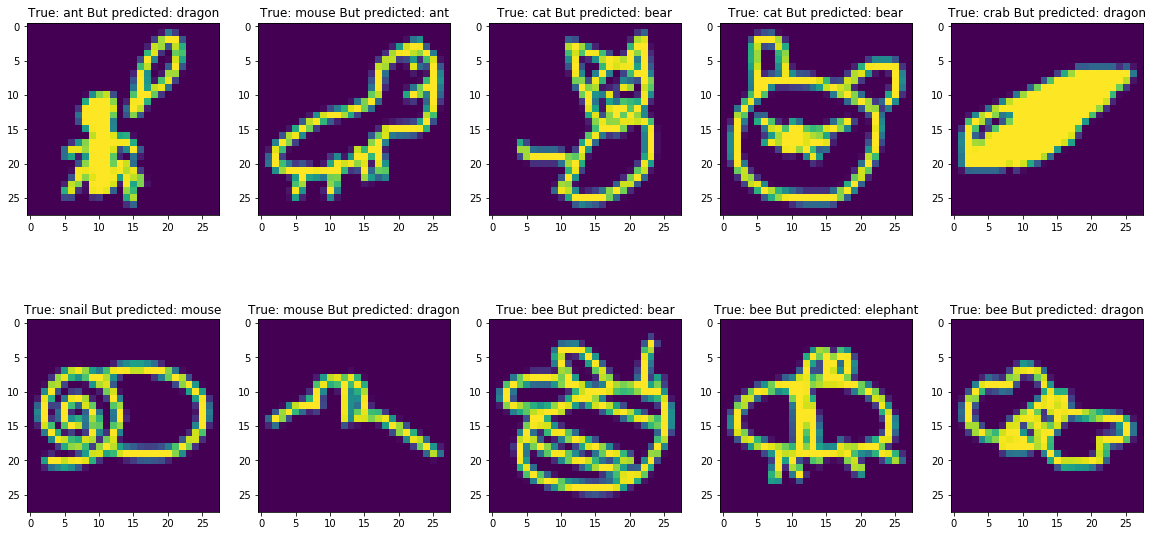

In [23]:
labels = ['ant', 'bear', 'bee', 'cat', 'crab', 'dragon', 'elephant', 'mouse', 'sea turtle', 'snail']
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(X_test[index[0][i]][:,:,0])
    plt.title('True: '+ labels[y_test[index[0][i]]]+' But predicted: '+labels[y_pred_[index[0][i]]])
plt.show()